In [63]:
#Importing Libraries
import keras
from keras.datasets import mnist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

import keras
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dense,BatchNormalization,MaxPooling2D,Conv2D,Activation,Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import SGD

In [46]:
#Processesing Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

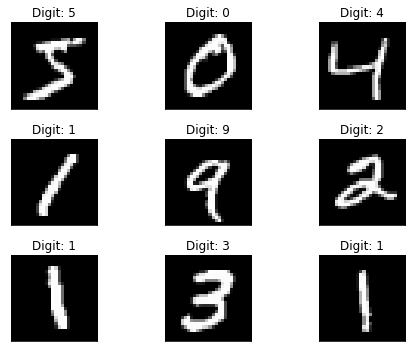

In [47]:
#Visualizing the Data
plt.figure(figsize=(7,5))
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(X_train[i],cmap='gray')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()

In [48]:
X_train = X_train.reshape(X_train.shape[0], 28,28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28,28, 1)

In [50]:
X_train.shape

(60000, 28, 28, 1)

In [51]:
#Converting the given data to a binary vector
X_train = X_train/255
X_test = X_test/255

In [52]:
num_category = 10
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

In [64]:
#Building the Model

model=Sequential()
#First Layer
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))

#Second Layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))

#Third Layer
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

#Fully Flattened Layer
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# Compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)             

In [65]:
#Fitting of the Data
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/10
469/469 [==============================] - 71s 150ms/step - loss: 0.1779 - accuracy: 0.9449 - val_loss: 0.0604 - val_accuracy: 0.9807
Epoch 2/10
469/469 [==============================] - 70s 149ms/step - loss: 0.0583 - accuracy: 0.9819 - val_loss: 0.0448 - val_accuracy: 0.9849
Epoch 3/10
469/469 [==============================] - 70s 149ms/step - loss: 0.0409 - accuracy: 0.9872 - val_loss: 0.0369 - val_accuracy: 0.9871
Epoch 4/10
469/469 [==============================] - 69s 148ms/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 0.0332 - val_accuracy: 0.9886
Epoch 5/10
469/469 [==============================] - 70s 148ms/step - loss: 0.0260 - accuracy: 0.9920 - val_loss: 0.0339 - val_accuracy: 0.9892
Epoch 6/10
469/469 [==============================] - 70s 149ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0311 - val_accuracy: 0.9901
Epoch 7/10
469/469 [==============================] - 70s 149ms/step - loss: 0.0175 - accuracy: 0.9942 - val_loss: 0.0298 - val_ac